In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('results latest.csv')

In [42]:
methods = df["Attribution Method"].unique()
layers = df["Layer"].unique()
metrics = df["Metric"].unique()

In [43]:
df

,Model,Attribution Method,Layer,Metric,Upscale Method,Value
0,VGG11,_GradCAMPlusPlus,features.0,sensitivity,SimpleUpsampling,2.498130
1,VGG11,_GradCAMPlusPlus,features.0,infidelity,SimpleUpsampling,0.021128
2,VGG11,_GradCAMPlusPlus,features.0,road_combined,SimpleUpsampling,0.036650
3,VGG11,_GradCAMPlusPlus,features.1,sensitivity,SimpleUpsampling,0.032888
4,VGG11,_GradCAMPlusPlus,features.1,infidelity,SimpleUpsampling,0.026779
...,...,...,...,...,...,...
121,VGG11,_DeepLiftShap,features.19,infidelity,SimpleUpsampling,0.212604
122,VGG11,_DeepLiftShap,features.19,road_combined,SimpleUpsampling,0.198329
123,VGG11,_DeepLiftShap,features.20,sensitivity,SimpleUpsampling,0.042393
124,VGG11,_DeepLiftShap,features.20,infidelity,SimpleUpsampling,0.278589


In [44]:
import sys
sys.path.append('../')

from models import vgg11_PascalVOC
model = vgg11_PascalVOC()

layer_types = {}
types = []
for i, layer in enumerate(layers):
    layer_type = model.features[int(layer.split(".")[-1])].__class__.__name__
    layer_types[layer] = layer_type
    if layer_type not in types:
        types.append(layer_type)

print(types)
print(layer_types)

['Conv2d', 'ReLU', 'MaxPool2d']
{'features.0': 'Conv2d', 'features.1': 'ReLU', 'features.2': 'MaxPool2d', 'features.3': 'Conv2d', 'features.4': 'ReLU', 'features.5': 'MaxPool2d', 'features.6': 'Conv2d', 'features.7': 'ReLU', 'features.8': 'Conv2d', 'features.9': 'ReLU', 'features.10': 'MaxPool2d', 'features.11': 'Conv2d', 'features.12': 'ReLU', 'features.13': 'Conv2d', 'features.14': 'ReLU', 'features.15': 'MaxPool2d', 'features.16': 'Conv2d', 'features.17': 'ReLU', 'features.18': 'Conv2d', 'features.19': 'ReLU', 'features.20': 'MaxPool2d'}


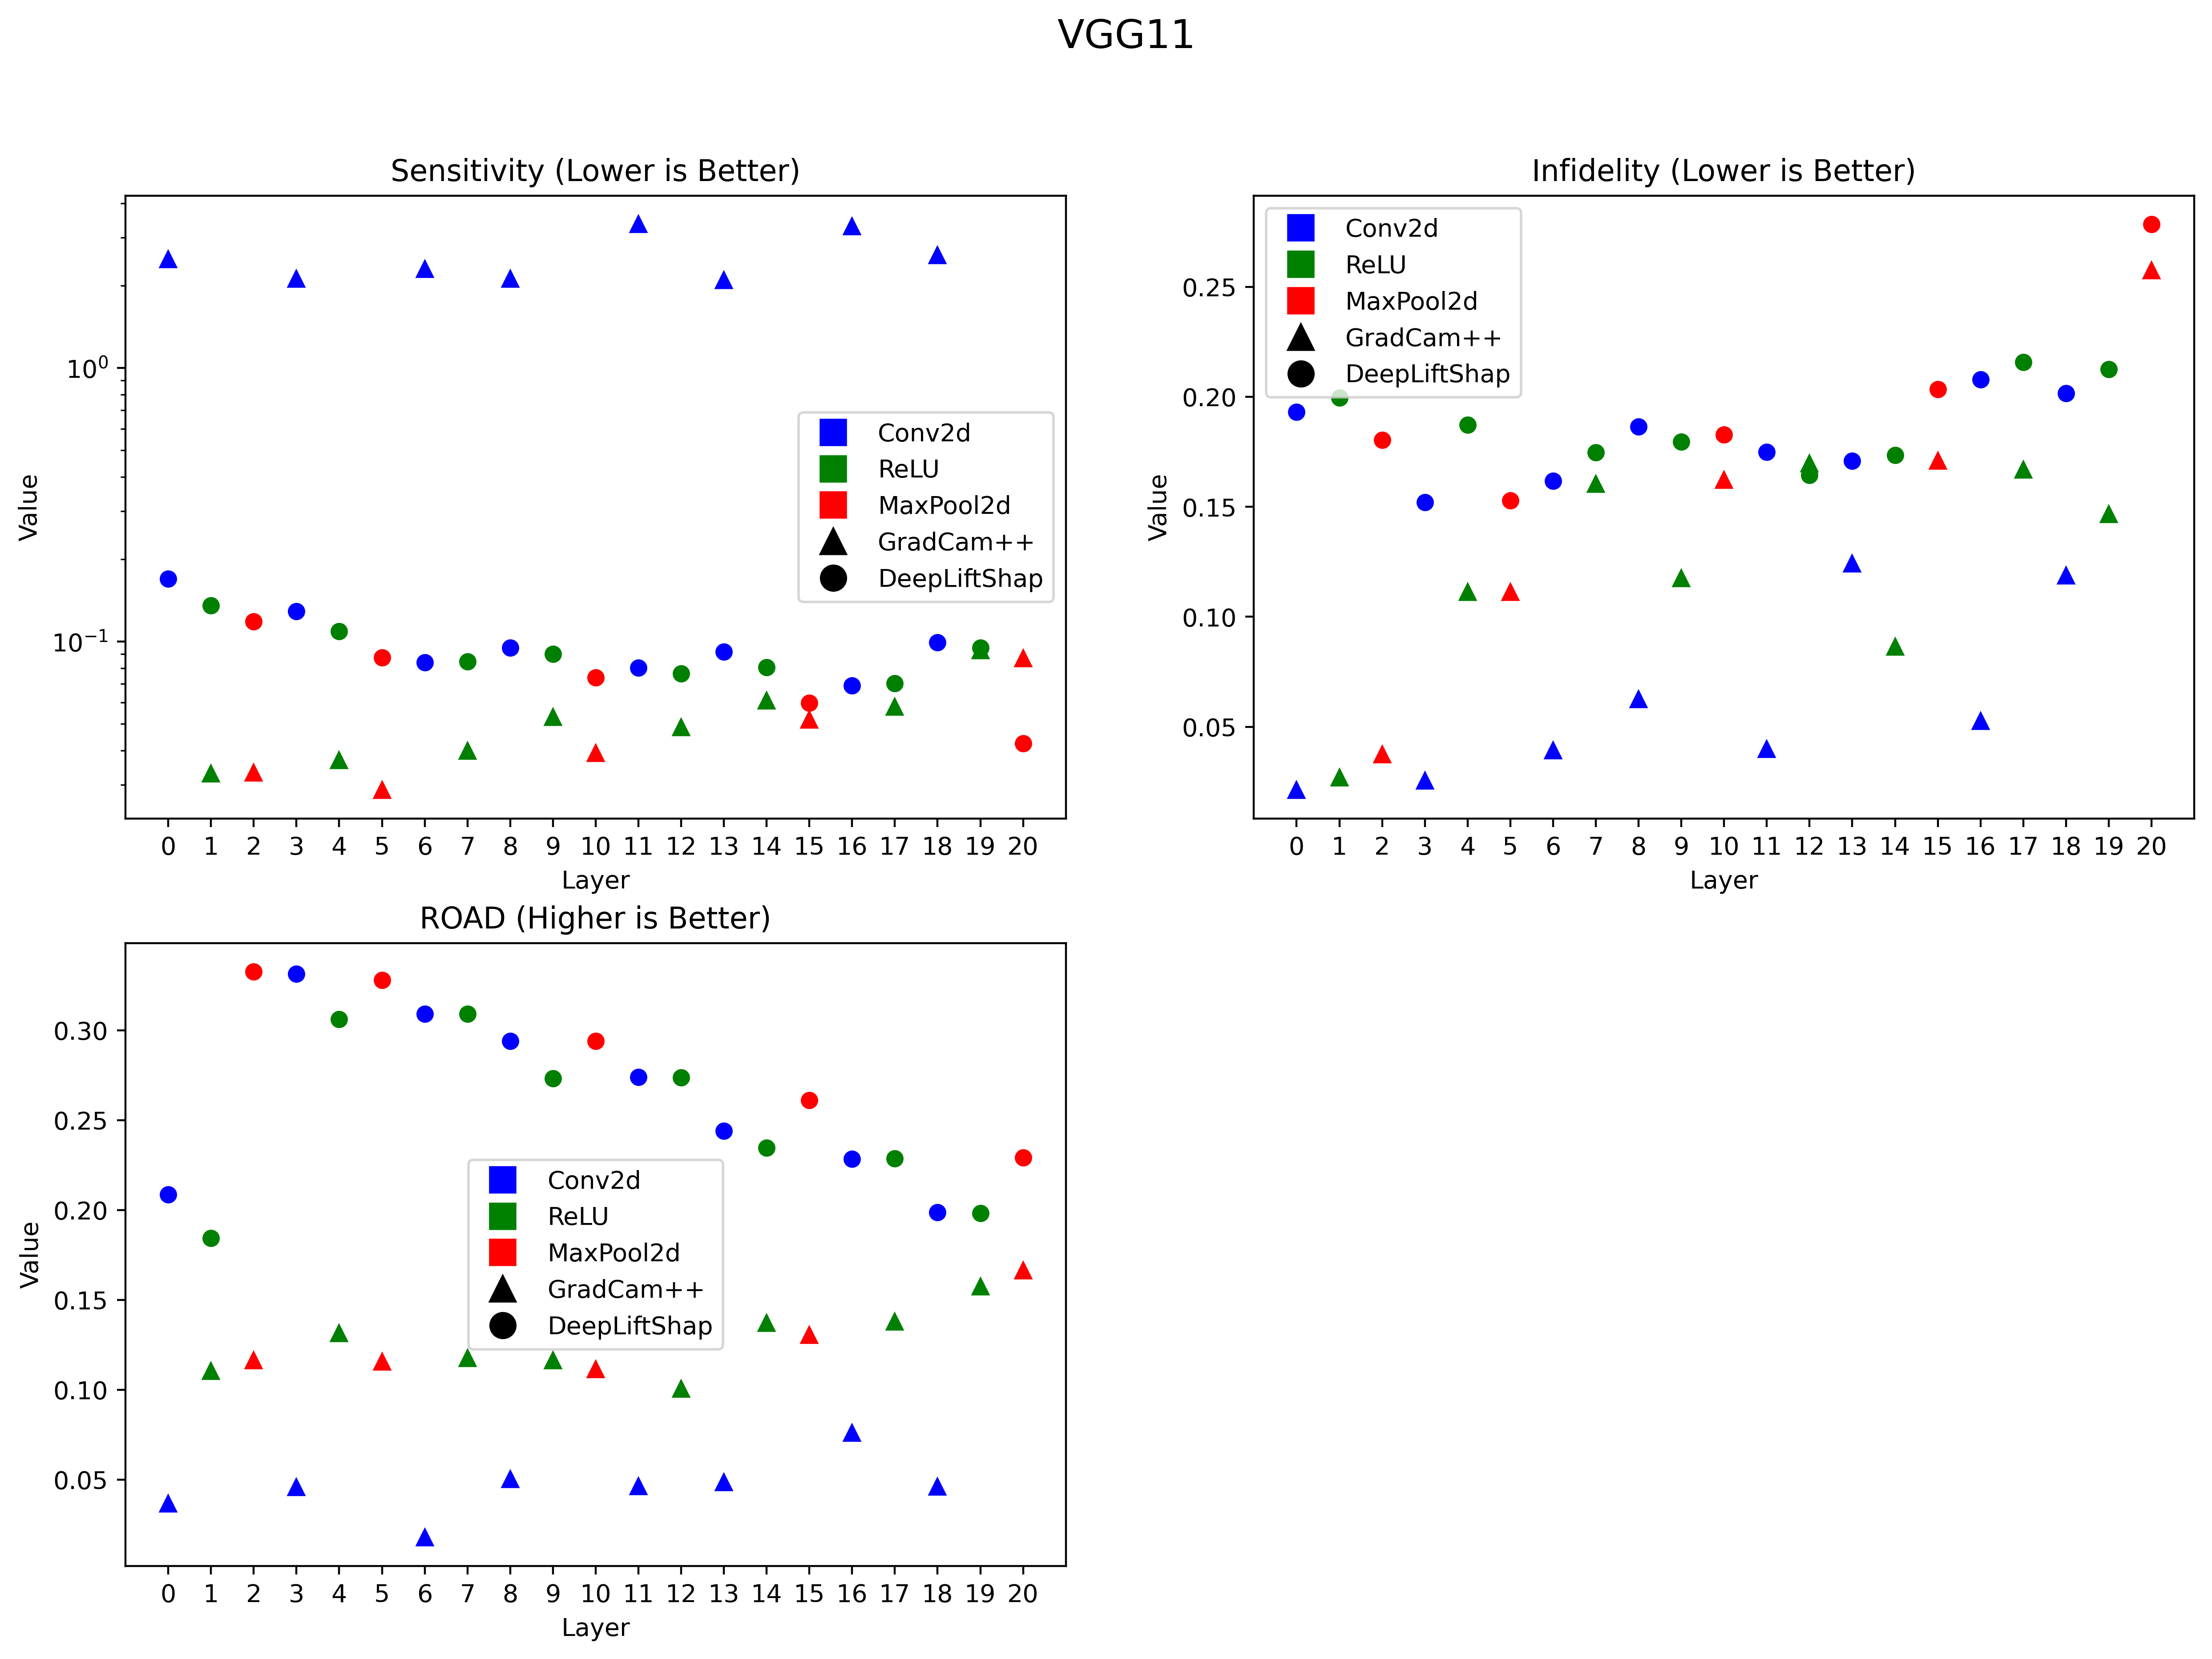

In [45]:
import matplotlib.lines as mlines


color_for_layers = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
shape_for_methods = {"GradCam++": "^","DeepLiftShap": "o"}  # Define shape mapping
titles = {
    "sensitivity": "Sensitivity (Lower is Better)",
    "infidelity": "Infidelity (Lower is Better)",
    "road_combined": "ROAD (Higher is Better)",
}

plt.figure(figsize=(15,10), dpi=400)
plt.suptitle('VGG11', fontsize=16)
plt.tight_layout()


for index, metric in enumerate(metrics):
    plt.subplot(2, 2, index + 1)
    plt.title(titles[metric])
    for method in methods:
            for layer_type in types:
                res = df[(df["Attribution Method"] == method) & (df["Metric"] == metric) & (df["Layer"].apply(lambda x: layer_types[x] == layer_type))]
                indices = res["Layer"].apply(lambda x: int(x.split(".")[-1]))
                # values = [res[res["Layer"] == f"features.{l}"]["Value"].values[0] for l in range(21)]
                values = [res[res["Layer"] == f"features.{l}"]["Value"].values[0] for l in indices]

                plt.plot(indices, values,"o" if method == "_DeepLiftShap" else "^", label=layer_type, color=color_for_layers[types.index(layer_type)])
                plt.xlabel("Layer")
                plt.ylabel("Value")
                # Log scale for y
                if metric == "sensitivity":
                    plt.yscale("log")


    # Create color legend (Layer Types)
    color_legend = [mlines.Line2D([], [], color=color, marker='s', linestyle='None', markersize=10, label=layer) 
                    for color, layer in zip(color_for_layers, types)]

    # Create shape legend (Methods)
    shape_legend = [mlines.Line2D([], [], color='black', marker=shape, linestyle='None', markersize=10, label=method) 
                    for method, shape in shape_for_methods.items()]
    
    plt.xticks(range(len(layers)))
    plt.legend(handles=color_legend + shape_legend)

plt.savefig('results new.pdf', dpi=400, bbox_inches='tight')


In [46]:
df_erf = pd.read_csv('results erf.csv')
# Merge the two dataframes
df = pd.concat([df, df_erf])

upscale_methods = df["Upscale Method"].unique()
layers = df["Layer"].unique()
metrics = df["Metric"].unique()

    Model Attribution Method        Layer       Metric    Upscale Method  \
0   VGG11   _GradCAMPlusPlus   features.0  sensitivity  SimpleUpsampling   
9   VGG11   _GradCAMPlusPlus   features.3  sensitivity  SimpleUpsampling   
18  VGG11   _GradCAMPlusPlus   features.6  sensitivity  SimpleUpsampling   
24  VGG11   _GradCAMPlusPlus   features.8  sensitivity  SimpleUpsampling   
33  VGG11   _GradCAMPlusPlus  features.11  sensitivity  SimpleUpsampling   
39  VGG11   _GradCAMPlusPlus  features.13  sensitivity  SimpleUpsampling   
48  VGG11   _GradCAMPlusPlus  features.16  sensitivity  SimpleUpsampling   
54  VGG11   _GradCAMPlusPlus  features.18  sensitivity  SimpleUpsampling   

       Value  
0   2.498130  
9   2.114678  
18  2.293561  
24  2.117707  
33  3.358399  
39  2.089343  
48  3.293000  
54  2.581522  
    Model Attribution Method        Layer       Metric    Upscale Method  \
3   VGG11   _GradCAMPlusPlus   features.1  sensitivity  SimpleUpsampling   
12  VGG11   _GradCAMPlusPlus

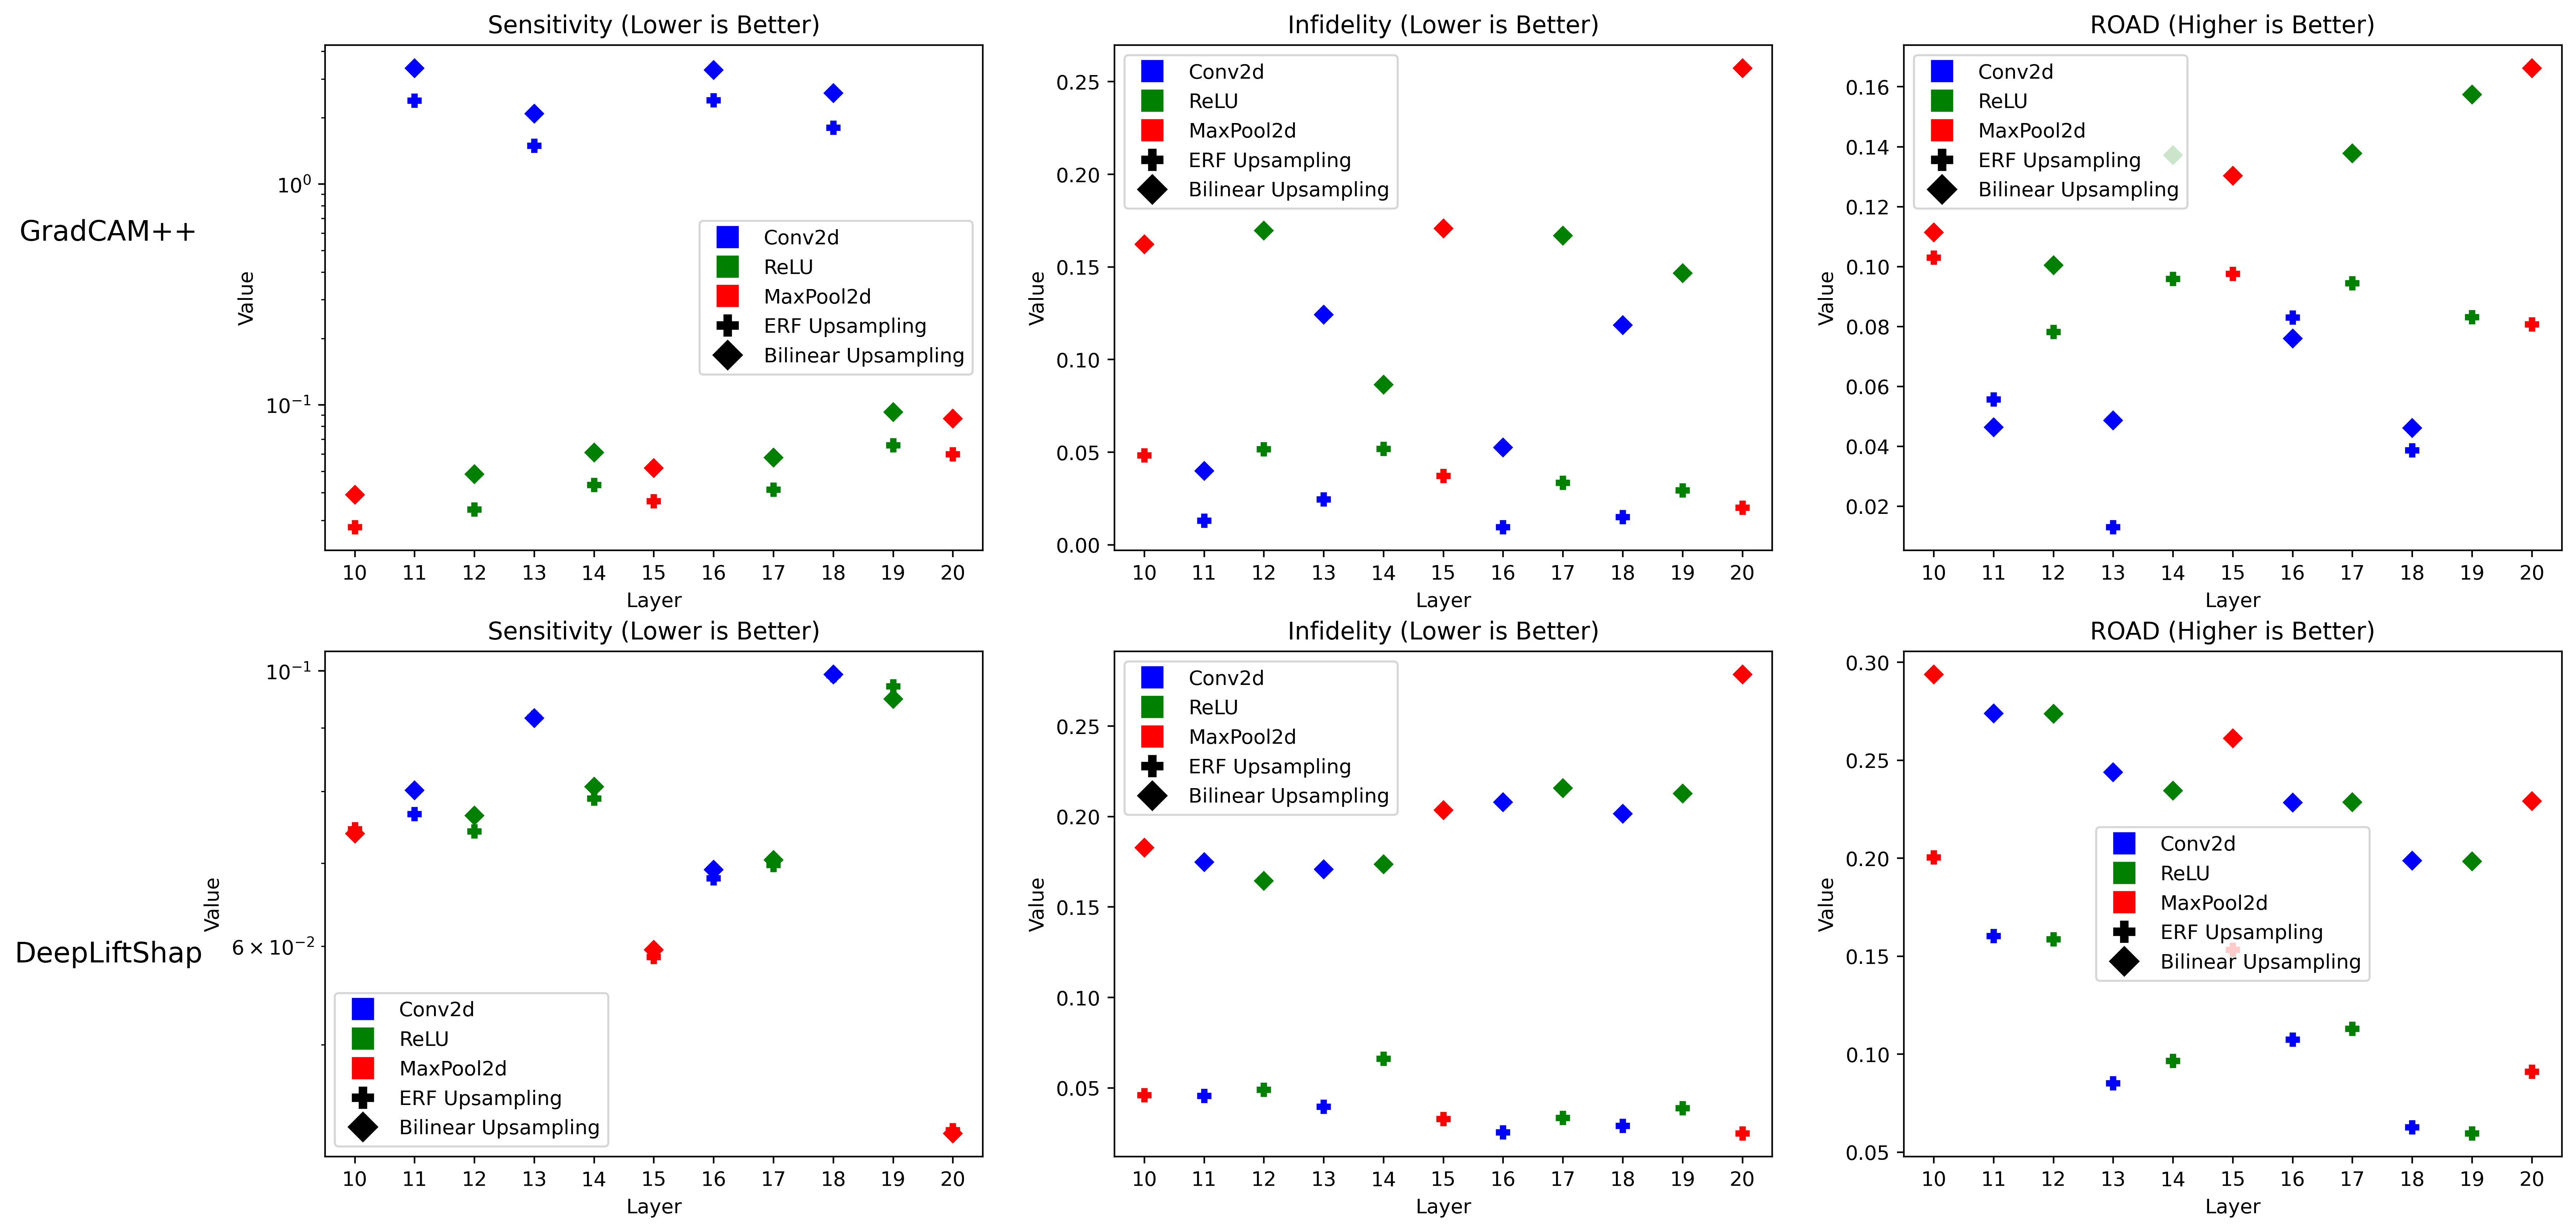

In [47]:
import matplotlib.lines as mlines


color_for_layers = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
shape_for_upscale = {"ERFUpsampling": "P","SimpleUpsampling": "D"}  # Define shape mapping
upscale_names = {"ERFUpsampling": "ERF Upsampling", "SimpleUpsampling": "Bilinear Upsampling"}  # Define shape mapping
titles = {
    "sensitivity": "Sensitivity (Lower is Better)",
    "infidelity": "Infidelity (Lower is Better)",
    "road_combined": "ROAD (Higher is Better)",
}

fig = plt.figure(figsize=(20,10), dpi=400)


fig.text(0.05, 0.75, 'GradCAM++', ha='center', va='center', fontsize=14) # , fontweight='bold')
fig.text(0.05, 0.25, 'DeepLiftShap', ha='center', va='center', fontsize=14) # , fontweight='bold')

# plt.suptitle('VGG11', fontsize=16)
plt.tight_layout()


for j, attr_method in enumerate(["_GradCAMPlusPlus", "_DeepLiftShap"]):
    for index, metric in enumerate(metrics):
        plt.subplot(2, 3, j*3 + index + 1)
        plt.title(titles[metric])
        for upscale in upscale_methods:
            for layer_type in types:
                res = df[(df["Upscale Method"] == upscale) &
                        (df["Metric"] == metric) &
                        (df["Layer"].apply(lambda x: layer_types[x] == layer_type)) &
                        (df["Attribution Method"] == attr_method)]
                print(res)
                indices = res["Layer"].apply(lambda x: int(x.split(".")[-1]))
                # print(indices)
                indices = [i for i in indices if i >= 10]
                # values = [res[res["Layer"] == f"features.{l}"]["Value"].values[0] for l in range(21)]
                values = [res[res["Layer"] == f"features.{l}"]["Value"].values[0] for l in indices]

                plt.plot(indices, values,shape_for_upscale[upscale], label=layer_type, color=color_for_layers[types.index(layer_type)])
                plt.xlabel("Layer")
                plt.ylabel("Value")
                # Log scale for y
                if metric == "sensitivity":
                    plt.yscale("log")


        # Create color legend (Layer Types)
        color_legend = [mlines.Line2D([], [], color=color, marker='s', linestyle='None', markersize=10, label=layer) 
                        for color, layer in zip(color_for_layers, types)]

        # Create shape legend (Methods)
        shape_legend = [mlines.Line2D([], [], color='black', marker=shape, linestyle='None', markersize=10, label=upscale_names[upscale]) 
                        for upscale, shape in shape_for_upscale.items()]
        
        plt.xticks(range(10,len(layers)))
        plt.legend(handles=color_legend + shape_legend)

plt.savefig('results erf.pdf', dpi=400, bbox_inches='tight')


In [48]:
df_synth = pd.read_csv('results synth.csv')
# Merge the two dataframes
df = pd.concat([df, df_synth])

upscale_methods = df["Upscale Method"].unique()
layers = df["Layer"].unique()
# metrics = df["Metric"].unique()
metrics = ["precision", "recall"] 

In [49]:
# Drop na
df = df.dropna()

      Model Attribution Method        Layer     Metric    Upscale Method  \
3072  VGG11   _GradCAMPlusPlus  features.11  precision  SimpleUpsampling   
3076  VGG11   _GradCAMPlusPlus  features.11  precision  SimpleUpsampling   
3080  VGG11   _GradCAMPlusPlus  features.11  precision  SimpleUpsampling   
3084  VGG11   _GradCAMPlusPlus  features.11  precision  SimpleUpsampling   
3088  VGG11   _GradCAMPlusPlus  features.11  precision  SimpleUpsampling   
...     ...                ...          ...        ...               ...   
5100  VGG11   _GradCAMPlusPlus  features.18  precision  SimpleUpsampling   
5104  VGG11   _GradCAMPlusPlus  features.18  precision  SimpleUpsampling   
5108  VGG11   _GradCAMPlusPlus  features.18  precision  SimpleUpsampling   
5112  VGG11   _GradCAMPlusPlus  features.18  precision  SimpleUpsampling   
5116  VGG11   _GradCAMPlusPlus  features.18  precision  SimpleUpsampling   

         Value  
3072  0.041362  
3076  0.000924  
3080  0.003113  
3084  0.131288  
30

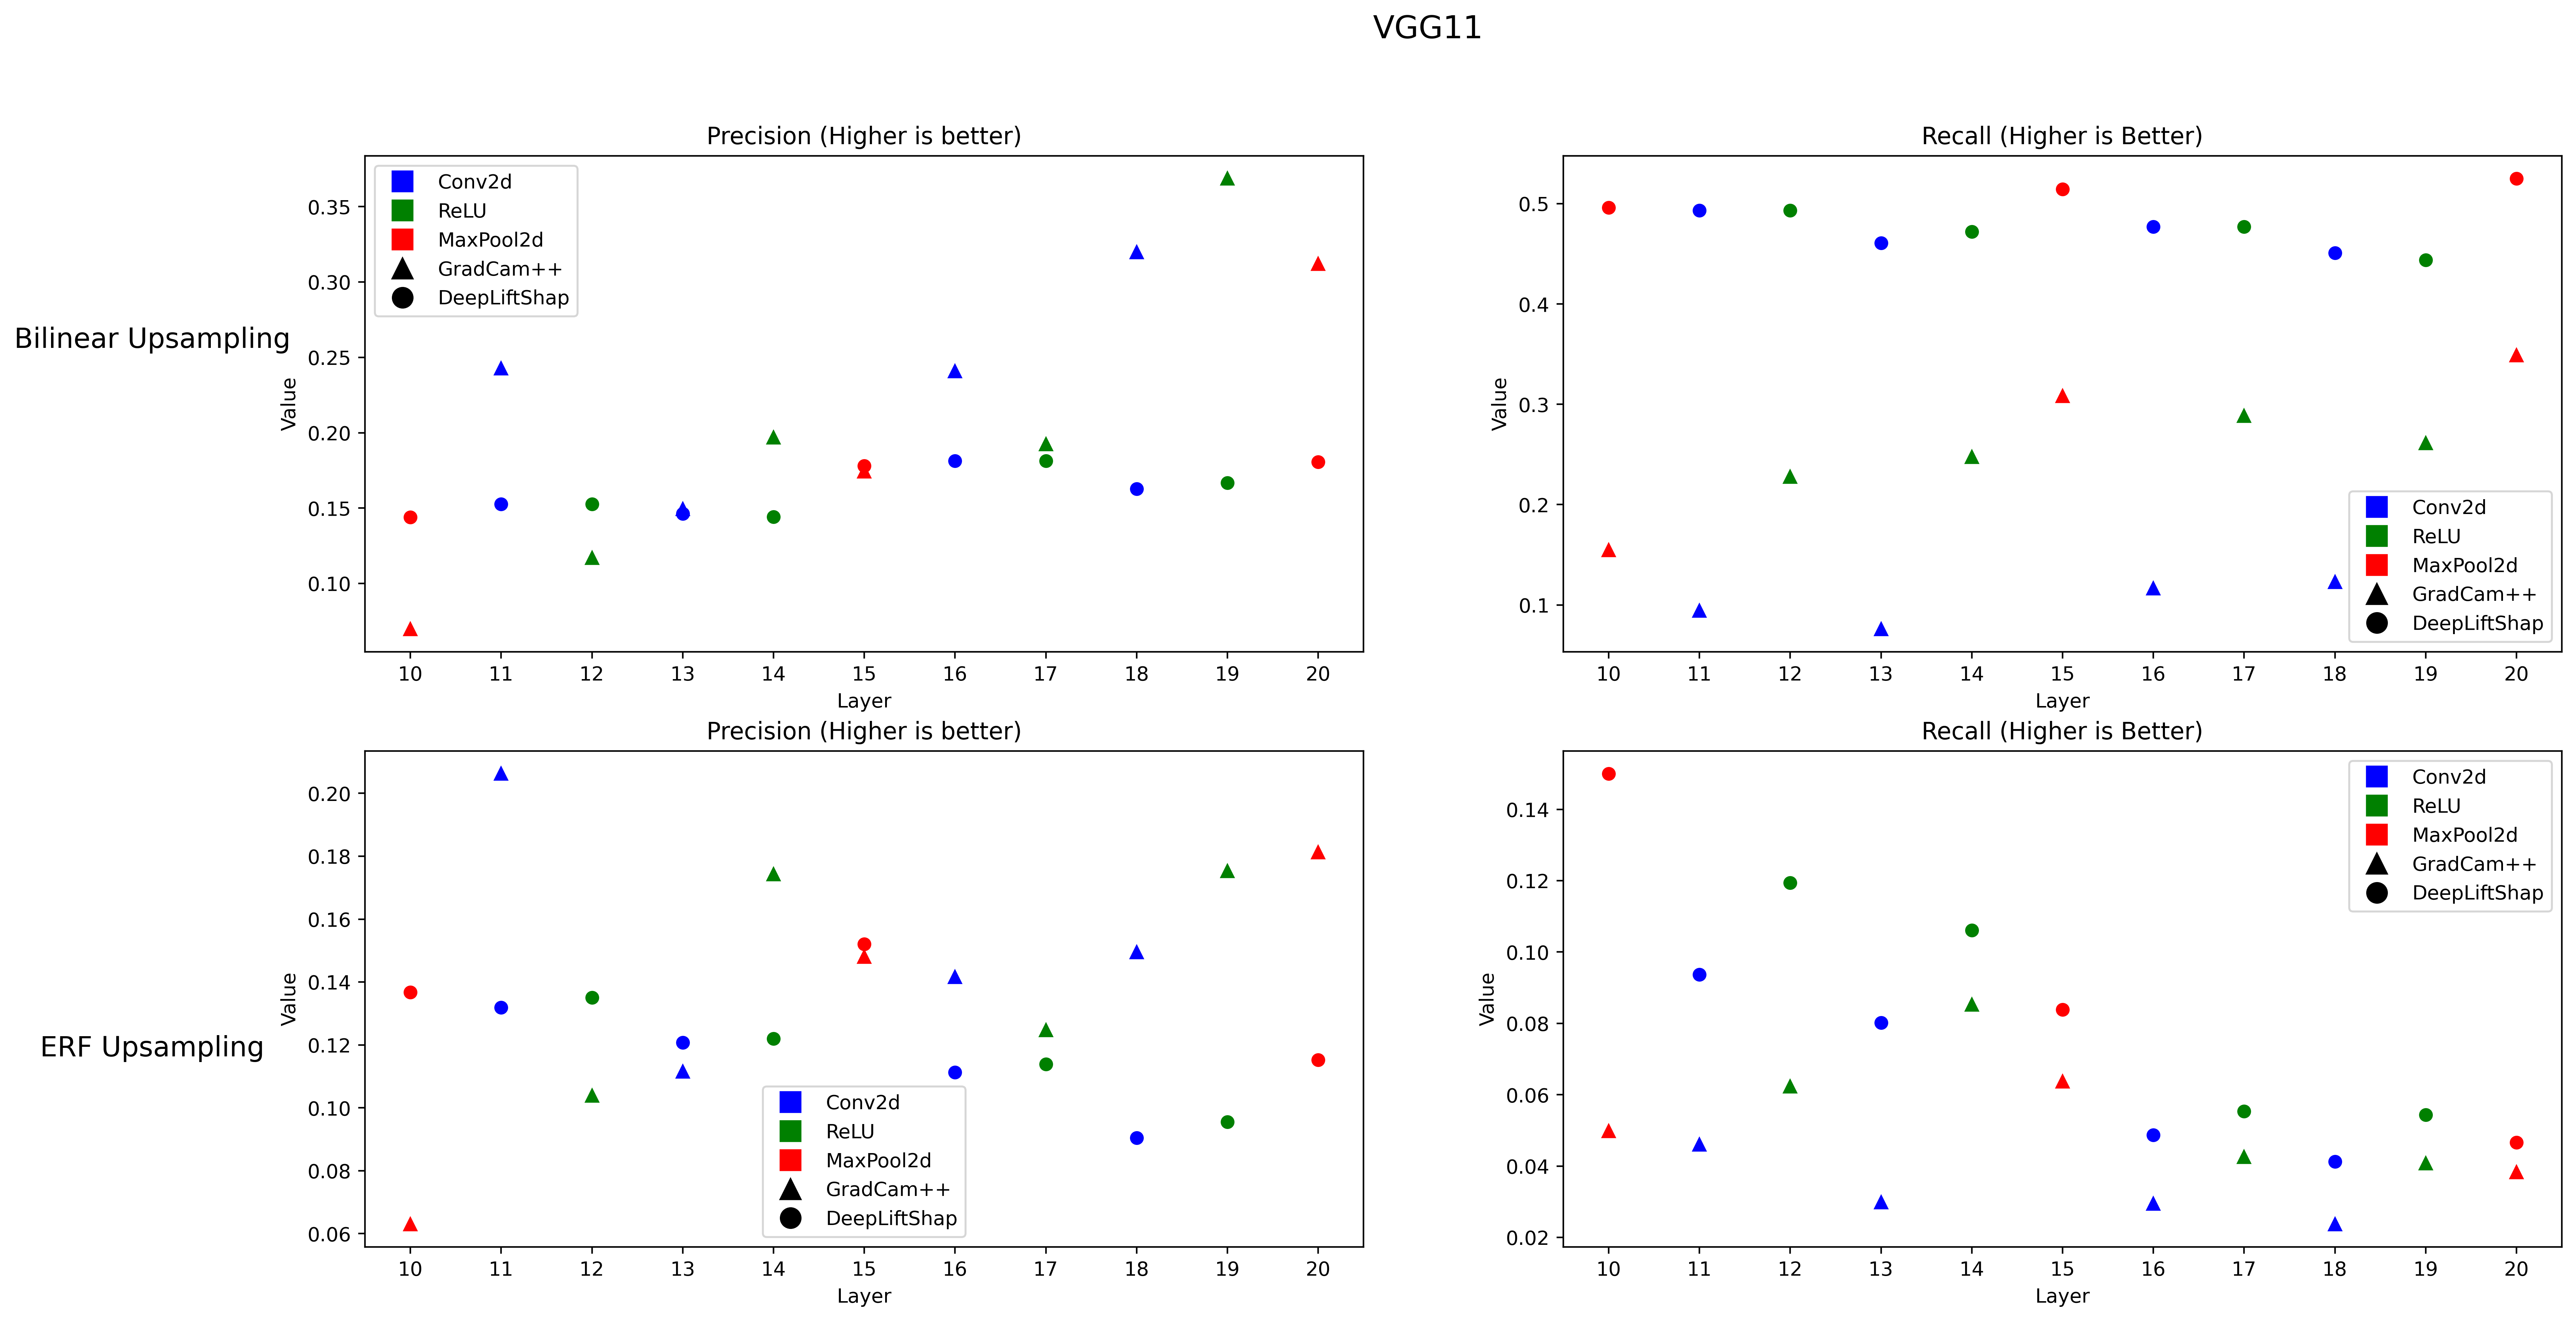

In [50]:
import matplotlib.lines as mlines


color_for_layers = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
shape_for_methods = {"GradCam++": "^","DeepLiftShap": "o"}  # Define shape mapping
titles = {
    "precision": "Precision (Higher is better)",
    "recall": "Recall (Higher is Better)",
    "road_combined": "ROAD (Higher is Better)",
}

fig = plt.figure(figsize=(20,10), dpi=400)


fig.text(0.05, 0.75, 'Bilinear Upsampling', ha='center', va='center', fontsize=14) # , fontweight='bold')
fig.text(0.05, 0.25, 'ERF Upsampling', ha='center', va='center', fontsize=14) # , fontweight='bold')

plt.suptitle('VGG11', fontsize=16)
plt.tight_layout()

for j, upscale in enumerate(upscale_methods):
    for index, metric in enumerate(metrics):
        plt.subplot(2, 2,j*2 + index + 1)
        plt.title(titles[metric])
        for method in methods:
            for layer_type in types:
                res = df[(df["Attribution Method"] == method) &
                            (df["Metric"] == metric) &
                            (df["Layer"].apply(lambda x: layer_types[x] == layer_type)) &
                            (df["Upscale Method"] == upscale)]
                # print(res.to_numpy().shape)
                # mean = res.to_numpy()
                print(res)
                indices = res["Layer"].apply(lambda x: int(x.split(".")[-1]))
                indices = list({i for i in indices if i >= 10})
                to_plot = []
                for l in indices:
                # values = [res[res["Layer"] == f"features.{l}"]["Value"].values[0] for l in range(21)]
                    values = np.array(res[res["Layer"] == f"features.{l}"]["Value"].values)
                    print(values.mean(), values.std())
                    to_plot.append(values.mean())

                print(indices, to_plot)

                plt.plot(indices, to_plot,"o" if method == "_DeepLiftShap" else "^", label=layer_type, color=color_for_layers[types.index(layer_type)])
                plt.xlabel("Layer")
                plt.ylabel("Value")
                # Log scale for y
                if metric == "sensitivity":
                    plt.yscale("log")


        # Create color legend (Layer Types)
        color_legend = [mlines.Line2D([], [], color=color, marker='s', linestyle='None', markersize=10, label=layer) 
                        for color, layer in zip(color_for_layers, types)]

        # Create shape legend (Methods)
        shape_legend = [mlines.Line2D([], [], color='black', marker=shape, linestyle='None', markersize=10, label=method) 
                        for method, shape in shape_for_methods.items()]
        
        plt.xticks(range(10, len(layers)))
        plt.legend(handles=color_legend + shape_legend)

plt.savefig('results synth.pdf', dpi=400, bbox_inches='tight')
